In [1]:
import numpy as np
import pandas as pd

# 1. Handling Mixed Values

In [2]:
data = pd.read_csv('data/titanic/train.csv', usecols = ['Cabin','Ticket','SibSp','Parch','Survived'])
data.head()

,Survived,SibSp,Parch,Ticket,Cabin
0,0,1,0,A/5 21171,NaN
1,1,1,0,PC 17599,C85
2,1,0,0,STON/O2. 3101282,NaN
3,1,1,0,113803,C123
4,0,0,0,373450,NaN


In [3]:
data['family']=data['SibSp']+data['Parch']

In [4]:
data = data.drop(['SibSp','Parch'],axis=1)
data

,Survived,Ticket,Cabin,family
0,0,A/5 21171,NaN,1
1,1,PC 17599,C85,1
2,1,STON/O2. 3101282,NaN,0
3,1,113803,C123,1
4,0,373450,NaN,0
...,...,...,...,...
886,0,211536,NaN,0
887,1,112053,B42,0
888,0,W./C. 6607,NaN,3
889,1,111369,C148,0


In [5]:
for i in range(len(data)):
    if(data['family'][i]==0):
        data['family'][i]='A'

C:\Users\91700\AppData\Local\Temp/ipykernel_1904/377498818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['family'][i]='A'
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
data

,Survived,Ticket,Cabin,family
0,0,A/5 21171,NaN,1
1,1,PC 17599,C85,1
2,1,STON/O2. 3101282,NaN,A
3,1,113803,C123,1
4,0,373450,NaN,A
...,...,...,...,...
886,0,211536,NaN,A
887,1,112053,B42,A
888,0,W./C. 6607,NaN,3
889,1,111369,C148,A


In [7]:
data['family'].unique()

array([1, 'A', 4, 2, 6, 5, 3, 7, 10], dtype=object)

### Extract numerical part

In [8]:
data['family_numerical']= pd.to_numeric(data['family'],errors='coerce',downcast='integer')

### Extract categorical part

In [9]:
data['family_categorical']=np.where(data['family_numerical'].isna(),data['family'],np.nan)

In [10]:
data.head()

,Survived,Ticket,Cabin,family,family_numerical,family_categorical
0,0,A/5 21171,NaN,1,1.0,NaN
1,1,PC 17599,C85,1,1.0,NaN
2,1,STON/O2. 3101282,NaN,A,NaN,A
3,1,113803,C123,1,1.0,NaN
4,0,373450,NaN,A,NaN,A


### Extract numerical part from same string

In [11]:
data['cabin_numerical']=data['Cabin'].str.extract('(\d+)')


### Extract categorical part from same string

In [12]:
data['cabin_categorical']=data['Cabin'].str[0]

In [13]:
data

,Survived,Ticket,Cabin,family,family_numerical,family_categorical,cabin_numerical,cabin_categorical
0,0,A/5 21171,NaN,1,1.0,NaN,NaN,NaN
1,1,PC 17599,C85,1,1.0,NaN,85,C
2,1,STON/O2. 3101282,NaN,A,NaN,A,NaN,NaN
3,1,113803,C123,1,1.0,NaN,123,C
4,0,373450,NaN,A,NaN,A,NaN,NaN
...,...,...,...,...,...,...,...,...
886,0,211536,NaN,A,NaN,A,NaN,NaN
887,1,112053,B42,A,NaN,A,42,B
888,0,W./C. 6607,NaN,3,3.0,NaN,NaN,NaN
889,1,111369,C148,A,NaN,A,148,C


In [14]:
data['ticket_numerical']=data['Ticket'].apply(lambda s:s.split()[-1])
data['ticket_numerical']=pd.to_numeric(data['ticket_numerical'],errors='coerce',downcast='integer')

In [15]:
data['ticket_categorical']=data['Ticket'].apply(lambda s:s.split()[0])
data['ticket_categorical']=np.where(data['ticket_categorical'].str.isdigit(),np.nan,data['ticket_categorical'])

In [16]:
data.head()

,Survived,Ticket,Cabin,family,family_numerical,family_categorical,cabin_numerical,cabin_categorical,ticket_numerical,ticket_categorical
0,0,A/5 21171,NaN,1,1.0,NaN,NaN,NaN,21171.0,A/5
1,1,PC 17599,C85,1,1.0,NaN,85,C,17599.0,PC
2,1,STON/O2. 3101282,NaN,A,NaN,A,NaN,NaN,3101282.0,STON/O2.
3,1,113803,C123,1,1.0,NaN,123,C,113803.0,NaN
4,0,373450,NaN,A,NaN,A,NaN,NaN,373450.0,NaN


# 2. Handling Date and Time values

In [17]:
date  = pd.read_csv('data/orders.csv')
time = pd.read_csv('data/messages.csv')

In [18]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [19]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [20]:
date.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [21]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


* By default dates and times are object type data , so we need to convert them to datetime datatype

### working with dates

In [22]:
date['date']=pd.to_datetime(date['date']) #converted from object to datetime

In [23]:
date.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


* 1. Extract year
* 2. Extract month
* 3. Extract day
* 4. Extract month name
* 5. Extract day of the week
* 6. Extract name of day
* 7. Check weekend day or not
* 8. Extract week no.
* 9. Extract quarter
* 10. Extract semester

In [24]:
date['year']=date['date'].dt.year
date['month']=date['date'].dt.month
date['day_no']=date['date'].dt.day
date['month_name'] = date['date'].dt.month_name()
date['day_of_week'] = date['date'].dt.dayofweek
date['day_name']=date['date'].dt.day_name()
date['weekend_day'] = np.where(date['day_name'].isin(['Saturday','Sunday']),1,0)
date['week_no']=date['date'].dt.week
date['quarter'] = date['date'].dt.quarter
date['semester'] = np.where(date['quarter'].isin([1,2]),1,2)

date.head()

C:\Users\91700\AppData\Local\Temp/ipykernel_1904/3612579279.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  date['week_no']=date['date'].dt.week


,date,product_id,city_id,orders,year,month,day_no,month_name,day_of_week,day_name,weekend_day,week_no,quarter,semester
0,2019-12-10,5628,25,3,2019,12,10,December,1,Tuesday,0,50,4,2
1,2018-08-15,3646,14,157,2018,8,15,August,2,Wednesday,0,33,3,2
2,2018-10-23,1859,25,1,2018,10,23,October,1,Tuesday,0,43,4,2
3,2019-08-17,7292,25,1,2019,8,17,August,5,Saturday,1,33,3,2
4,2019-01-06,4344,25,3,2019,1,6,January,6,Sunday,1,1,1,1


* 11. Extract elapsed time 
* 12. Extract days elapsed
* 13. Extract months elapsed

In [25]:
import datetime

today = datetime.datetime.today()
today

datetime.datetime(2022, 2, 3, 9, 42, 33, 612207)

In [26]:
date['time_elapsed'] = today - date['date']
date['days_elapsed'] = (today-date['date']).dt.days
date['month_elapsed'] = (today - date['date'])/np.timedelta64(1,'M')
date.head()

,date,product_id,city_id,orders,year,month,day_no,month_name,day_of_week,day_name,weekend_day,week_no,quarter,semester,time_elapsed,days_elapsed,month_elapsed
0,2019-12-10,5628,25,3,2019,12,10,December,1,Tuesday,0,50,4,2,786 days 09:42:33.612207,786,25.837231
1,2018-08-15,3646,14,157,2018,8,15,August,2,Wednesday,0,33,3,2,1268 days 09:42:33.612207,1268,41.673285
2,2018-10-23,1859,25,1,2018,10,23,October,1,Tuesday,0,43,4,2,1199 days 09:42:33.612207,1199,39.406298
3,2019-08-17,7292,25,1,2019,8,17,August,5,Saturday,1,33,3,2,901 days 09:42:33.612207,901,29.615542
4,2019-01-06,4344,25,3,2019,1,6,January,6,Sunday,1,1,1,1,1124 days 09:42:33.612207,1124,36.942181


### working with time

In [27]:
time['date']=pd.to_datetime(time['date'])
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


* 1. Extract time
* 2. Extract date
* 3. Extract hour
* 4. Extract minute
* 5. Extract second
* 6. Extract hours elapsed
* 7. Extract minutes elapsed
* 8. Extract seconds elapsed

In [28]:
time['time'] = time['date'].dt.time
time['date_ex'] = time['date'].dt.date
time['hour'] = time['date'].dt.hour
time['mins'] = time['date'].dt.minute
time['seconds'] = time['date'].dt.second
time['hours_elapsed'] = (today-time['date'])/np.timedelta64(1,'h')
time['minutes_elapsed'] = (today-time['date'])/np.timedelta64(1,'m')
time['seconds_elapsed'] = (today-time['date'])/np.timedelta64(1,'s')
time.head()

,date,msg,time,date_ex,hour,mins,seconds,hours_elapsed,minutes_elapsed,seconds_elapsed
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,00:50:00,2013-12-15,0,50,0,71336.876003,4.280213e+06,2.568128e+08
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23:40:00,2014-04-29,23,40,0,68074.042670,4.084443e+06,2.450666e+08
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,00:21:00,2012-12-30,0,21,0,79737.359337,4.784242e+06,2.870545e+08
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,00:31:00,2014-11-28,0,31,0,62985.192670,3.779112e+06,2.267467e+08
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23:11:00,2013-10-26,23,11,0,72514.526003,4.350872e+06,2.610523e+08


# 3. Handling Missing Values (UNIVARIATE)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv("data/data_science_job.csv")
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [31]:
data.shape

(19158, 13)

In [32]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [33]:
data.isna().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

## CCA - Complete Case Analysis - Remove rows for missing value
 * remember - missing value percentage should be less than 5% 

In [34]:
cols = [x for x in data.columns if data[x].isna().mean()<0.05 and data[x].isna().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [35]:
df = data[cols]
df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [36]:
len(df[cols].dropna())/len(df) # percentage of rows that stay after removing missing values

0.8968577095730244

In [37]:
new_df = df[cols].dropna()
df.shape , new_df.shape

((19158, 5), (17182, 5))

### check whether performing CCA is safe - Numerical data

*  CCA performing on these columns is safe because no change in distribution which means data were missing at random


<function matplotlib.pyplot.show(close=None, block=None)>

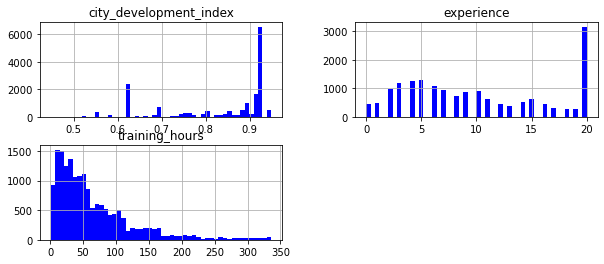

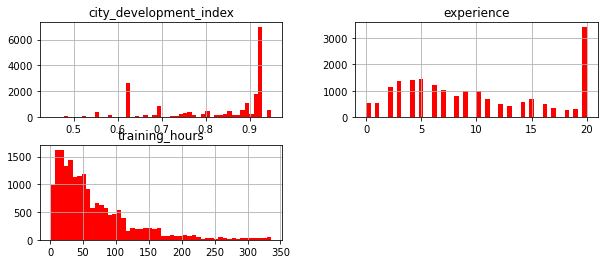

In [38]:
new_df.hist(bins = 50, color = 'blue', figsize=(10,4))
df.hist(bins = 50, color = 'red', figsize=(10,4))
plt.show



### check whether performing CCA is safe - Categorcial data

*  CCA performing on these columns is safe because ratio of value counts of each category is almost the same before and after CCA


In [39]:
elev_original = df['education_level'].value_counts()/len(df)
elev_cca = new_df['education_level'].value_counts()/len(new_df)
temp = pd.concat([elev_original, elev_cca],axis=1)
temp.columns = ['original', 'cca']
temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [40]:
enr_original = df['enrolled_university'].value_counts()/len(df)
enr_cca = new_df['enrolled_university'].value_counts()/len(new_df)
temp = pd.concat([enr_original, enr_cca],axis=1)
temp.columns = ['original', 'cca']
temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


## Mean-Median Imputation

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [114]:
data = pd.read_csv('data/titanic_toy.csv')
data.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [115]:
data.isna().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [116]:
X = data.drop("Survived", axis=1)
y = data['Survived']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [118]:
X_train.head()

,Age,Fare,Family
869,4.0,11.1333,2
600,24.0,27.0000,3
65,NaN,15.2458,2
2,26.0,7.9250,0
832,NaN,7.2292,0


In [119]:
X_test.isna().sum()

Age       42
Fare      11
Family     0
dtype: int64

In [120]:
X_test

,Age,Fare,Family
174,56.0,30.6958,0
46,NaN,15.5000,1
387,36.0,13.0000,0
813,6.0,31.2750,6
39,14.0,11.2417,1
...,...,...,...
842,30.0,31.0000,0
718,NaN,15.5000,0
496,54.0,78.2667,1
607,27.0,30.5000,0


In [121]:
age_imp = SimpleImputer(strategy='mean')
fare_imp = SimpleImputer(strategy='median')

In [122]:
tfr = ColumnTransformer([
    ('imputer1',age_imp,[0]),
    ('imputer2',fare_imp,[1]),
], remainder='passthrough')

In [123]:
X_train_trans = tfr.fit_transform(X_train)
X_train_trans

array([[ 4.        , 11.1333    ,  2.        ],
       [24.        , 27.        ,  3.        ],
       [29.46909879, 15.2458    ,  2.        ],
       ...,
       [47.        , 14.4       ,  2.        ],
       [54.        , 14.4       ,  1.        ],
       [54.        , 23.        ,  4.        ]])

In [52]:
tfr.named_transformers_['imputer1'].statistics_

array([29.38417678])

In [53]:
X_test = tfr.transform(X_test)

In [54]:
X_train_df = pd.DataFrame(X_train_trans,columns=['Age_new','Fare_new','Family'])
X_train_df

,Age_new,Fare_new,Family
0,29.384177,7.2292,0.0
1,29.384177,7.8792,0.0
2,31.000000,7.7750,0.0
3,29.384177,7.2250,0.0
4,33.000000,90.0000,1.0
...,...,...,...
707,29.000000,10.5000,0.0
708,24.000000,7.1417,0.0
709,45.000000,8.0500,0.0
710,22.000000,8.0500,0.0


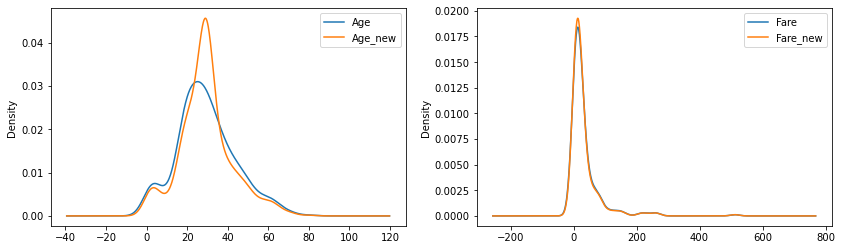

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(121)
X_train['Age'].plot(kind='kde', ax=ax)
X_train_df['Age_new'].plot(kind = 'kde', ax=ax )
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


ax2 = fig.add_subplot(122)
X_train['Fare'].plot(kind='kde', ax=ax2)
X_train_df['Fare_new'].plot(kind = 'kde', ax=ax2 )
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='best')

## End Of Distribution Imputation

In [56]:
data = pd.read_csv('data/titanic_toy.csv')
data.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [57]:
X = data.drop("Survived", axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

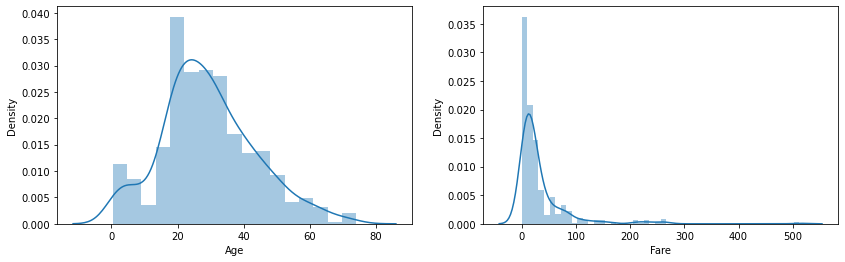

In [58]:
import seaborn as sns
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.subplot(122)
sns.distplot(X_train['Fare'])

* Age is almost Normally distributed hence : 
  --  mean + 3d or mean - 3d
  
* Fare is skewed hence :
  -- Q1 - 1.5 x IQR   or  Q3 + 1.5 x IQR

In [59]:
mu = X_train['Age'].mean()
dev = X_train['Age'].std()
val_1 = mu+3*dev

In [60]:
X_train.describe()

,Age,Fare,Family
count,571.000000,676.000000,712.000000
mean,29.310140,33.317097,0.949438
std,14.215283,51.056392,1.674740
min,0.420000,0.000000,0.000000
25%,20.000000,7.925000,0.000000
50%,28.000000,14.458300,0.000000
75%,38.000000,31.387500,1.000000
max,74.000000,512.329200,10.000000


In [61]:
Q1 = np.percentile(X_train, 25, interpolation = 'midpoint')
Q3 = np.percentile(X_train, 75, interpolation = 'midpoint')
IQR = Q3 - Q1
val_2 = Q3+1.5*IQR

In [62]:
age_imp = SimpleImputer(strategy='constant', fill_value=val_1)
fare_imp = SimpleImputer(strategy='constant', fill_value=val_2)

In [63]:
tfr = ColumnTransformer([
    ('imputer1',age_imp,[0]),
    ('imputer2',fare_imp,[1]),
], remainder='passthrough')

In [64]:
X_train_trans = tfr.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train_trans,columns=['Age_new','Fare_new','Family'])
X_train_df

,Age_new,Fare_new,Family
0,31.000000,NaN,0.0
1,22.000000,7.5208,0.0
2,28.500000,16.1000,0.0
3,31.000000,164.8667,2.0
4,71.955988,26.5500,0.0
...,...,...,...
707,39.000000,0.0000,0.0
708,29.000000,7.0458,1.0
709,57.000000,12.3500,0.0
710,11.000000,18.7875,0.0


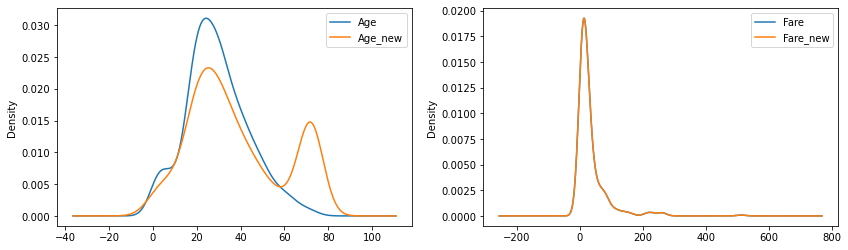

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(121)
X_train['Age'].plot(kind='kde', ax=ax)
X_train_df['Age_new'].plot(kind = 'kde', ax=ax )
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


ax2 = fig.add_subplot(122)
X_train['Fare'].plot(kind='kde', ax=ax2)
X_train_df['Fare_new'].plot(kind = 'kde', ax=ax2 )
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='best')

## Random Imputation (Numerical)

In [66]:
data = pd.read_csv('data/titanic_toy.csv')
data.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [67]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [68]:
X_train['Age'].isna().sum()

143

In [69]:
X_train['AgeImputed'] = X_train['Age']
X_train['FareImputed'] = X_train['Fare']

In [70]:
X_train['AgeImputed'][X_train['AgeImputed'].isna()] = X_train['Age'].dropna().sample(X_train['Age'].isna().sum()).values
X_train['FareImputed'][X_train['FareImputed'].isna()] = X_train['Fare'].dropna().sample(X_train['Fare'].isna().sum()).values

C:\Users\91700\AppData\Local\Temp/ipykernel_1904/845198653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['AgeImputed'][X_train['AgeImputed'].isna()] = X_train['Age'].dropna().sample(X_train['Age'].isna().sum()).values
C:\Users\91700\AppData\Local\Temp/ipykernel_1904/845198653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FareImputed'][X_train['FareImputed'].isna()] = X_train['Fare'].dropna().sample(X_train['Fare'].isna().sum()).values


In [71]:
X_train

,Age,Fare,Family,AgeImputed,FareImputed
380,42.0,227.5250,0,42.0,227.5250
292,36.0,12.8750,0,36.0,12.8750
241,NaN,15.5000,1,28.0,15.5000
390,36.0,120.0000,3,36.0,120.0000
745,70.0,71.0000,2,70.0,71.0000
...,...,...,...,...,...
29,NaN,7.8958,0,27.0,7.8958
318,31.0,164.8667,2,31.0,164.8667
218,32.0,76.2917,0,32.0,76.2917
792,NaN,69.5500,10,30.0,69.5500


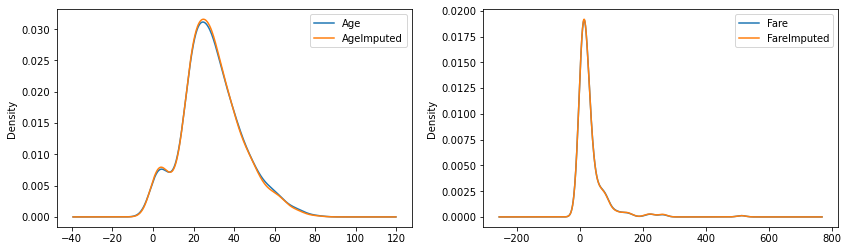

In [72]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(121)
X_train['Age'].plot(kind='kde', ax=ax)
X_train['AgeImputed'].plot(kind = 'kde', ax=ax )
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

ax2 = fig.add_subplot(122)
X_train['Fare'].plot(kind='kde', ax=ax2)
X_train['FareImputed'].plot(kind = 'kde', ax=ax2 )
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='best')

## Random Imputation (Categorical)

In [73]:
data = pd.read_csv('data/advreg.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [74]:
data.isna().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [75]:
X = data
y = data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [76]:
X_train['Fpimputed'] = X_train['FireplaceQu']
X_train['Gqimputed'] = X_train['GarageQual']

In [77]:
X_train['Fpimputed'][X_train['Fpimputed'].isna()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isna().sum()).values
X_train['Gqimputed'][X_train['Gqimputed'].isna()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isna().sum()).values

C:\Users\91700\AppData\Local\Temp/ipykernel_1904/3333279590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fpimputed'][X_train['Fpimputed'].isna()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isna().sum()).values
C:\Users\91700\AppData\Local\Temp/ipykernel_1904/3333279590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Gqimputed'][X_train['Gqimputed'].isna()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isna().sum()).values


In [78]:
X_train

,FireplaceQu,GarageQual,SalePrice,Fpimputed,Gqimputed
499,NaN,TA,120000,Ex,TA
304,Ex,TA,295000,Ex,TA
172,TA,Gd,239000,TA,Gd
427,NaN,TA,109008,TA,TA
401,Gd,TA,164990,Gd,TA
...,...,...,...,...,...
1113,NaN,TA,134500,TA,TA
662,TA,TA,110000,TA,TA
308,NaN,TA,82500,Gd,TA
624,TA,TA,165150,TA,TA


In [79]:
org = X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna())
imp = X_train['Fpimputed'].value_counts()/len(X_train)
temp_fp = pd.concat([org,imp],axis=1)
temp_fp.columns = ['original','imputed']

In [80]:
temp_fp

,original,imputed
Gd,0.499184,0.495719
TA,0.404568,0.408390
Fa,0.037520,0.036815
Ex,0.032626,0.032534
Po,0.026101,0.026541


In [81]:
org = X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna())
imp = X_train['Gqimputed'].value_counts()/len(X_train)
temp_gq = pd.concat([org,imp],axis=1)
temp_gq.columns = ['original','imputed']

In [82]:
temp_gq

,original,imputed
TA,0.948463,0.950342
Fa,0.036166,0.035103
Gd,0.009946,0.009418
Po,0.002712,0.002568
Ex,0.002712,0.002568


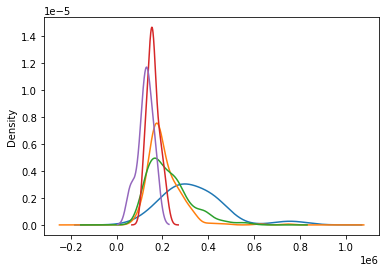

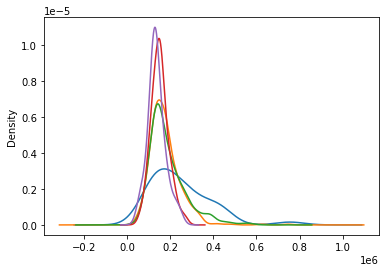

In [83]:
for category in X_train['FireplaceQu'].dropna().unique():
    X_train[X_train['FireplaceQu']==category]['SalePrice'].plot(kind ='kde') 
plt.show()
for category in X_train['Fpimputed'].dropna().unique():
    X_train[X_train['Fpimputed']==category]['SalePrice'].plot(kind ='kde') 
plt.show()

#massive change in distribution flag whiche means red flag i.e. this imputation shouldnot be performed

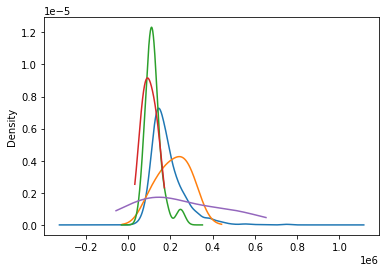

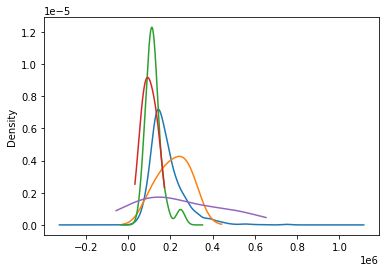

In [84]:
for category in X_train['GarageQual'].dropna().unique():
    X_train[X_train['GarageQual']==category]['SalePrice'].plot(kind ='kde') 
plt.show()
for category in X_train['Gqimputed'].dropna().unique():
    X_train[X_train['Gqimputed']==category]['SalePrice'].plot(kind ='kde') 
plt.show()

# similar distribution which means can be implemeted on this variable

# Missing Indicator

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import cross_val_score

In [86]:
data = pd.read_csv('data/titanic_toy.csv')
data.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [87]:
data.isna().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [88]:
X = data.drop('Survived',axis=1)
y = data['Survived']
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [89]:
imp = SimpleImputer()
X_train_trans = imp.fit_transform(X_train)
X_test_trans = imp.transform(X_test)

In [90]:
clf = LogisticRegression()
clf.fit(X_train_trans,y_train)
y_pred = clf.predict(X_test_trans)
print("Accuracy without missing iindicator:: ", accuracy_score(y_test,y_pred)*100)


Accuracy without missing iindicator::  67.59776536312849


In [91]:
mi = MissingIndicator()
mi.fit(X_train)
X_train_trans2 = mi.transform(X_train)
X_test_trans2 = mi.transform(X_test)

In [92]:
X_train_trans2[:,1:]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [93]:
X_train['AgeIndicator'] = X_train_trans2[:,:1]
X_test['AgeIndicator'] = X_test_trans2[:,:1]
X_train['FareIndicator'] = X_train_trans2[:,1:]
X_test['FareIndicator'] = X_test_trans2[:,1:]

In [94]:
X_train.head()

,Age,Fare,Family,AgeIndicator,FareIndicator
652,21.0,8.4333,0,False,False
427,19.0,26.0000,0,False,False
752,33.0,9.5000,0,False,False
881,33.0,7.8958,0,False,False
367,NaN,7.2292,0,True,False


In [95]:
imp2 = SimpleImputer()
X_train_trans2 = imp.fit_transform(X_train)
X_test_trans2 = imp.transform(X_test)

In [96]:
clf = LogisticRegression()
clf.fit(X_train_trans2,y_train)
y_pred2 = clf.predict(X_test_trans2)
print("Accuracy missing iindicator:: ", accuracy_score(y_test,y_pred2)*100)

Accuracy missing iindicator::  68.71508379888269


### Missing Indicator using sklearn

In [97]:
data = pd.read_csv('data/titanic_toy.csv')
data.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [98]:
X = data.drop('Survived',axis=1)
y = data['Survived']
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [99]:
imp = SimpleImputer(add_indicator=['True','True'])
X_train_trans = imp.fit_transform(X_train)
X_test_trans = imp.transform(X_test)

In [100]:
clf = LogisticRegression()
clf.fit(X_train_trans,y_train)
y_pred = clf.predict(X_test_trans)
print("Accuracy  iindicator:: ", accuracy_score(y_test,y_pred)*100)

Accuracy  iindicator::  68.71508379888269


##  GridSearchCV to find best Imputation Method

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [102]:
data = pd.read_csv('data/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
data = data.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [104]:
X = data.drop('Survived',axis=1)
y = data['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [105]:
X_train.head()
#categorical -Sex, Embarked
#numerical - Age, Fare

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
589,3,male,NaN,0,0,8.0500,S
765,1,female,51.0,1,0,77.9583,S
415,3,female,NaN,0,0,8.0500,S
502,3,female,NaN,0,0,7.6292,Q
358,3,female,NaN,0,0,7.8792,Q


In [106]:
numerical_features = ['Age','Fare']
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

In [107]:
categorical_features = ['Embarked','Sex']
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [108]:
preprocess_transformer = ColumnTransformer([
    ('numerical',num_transformer,numerical_features),
    ('categorical',cat_transformer,categorical_features)
],
 remainder='passthrough')

In [109]:
final_transformer = Pipeline(steps=[
    ('preprocessor',preprocess_transformer),
    ('model',LogisticRegression())
])

In [110]:
from sklearn import set_config
set_config(display='diagram')
res_trans

NameError: name 'res_trans' is not defined

In [ ]:
grid = {
     'preprocessor__numerical__imputer__strategy':['mean', 'median'],
     'preprocessor__categorical__imputer__strategy':['most_frequent','constant'],
     'model__C':[0.1,1.0,5.0,10.0,100.0],
     'model__solver':['newton-cg','lbfgs','liblinear','sag','saga']}

In [ ]:
final_transformer_gcv = GridSearchCV(estimator=final_transformer,param_grid=grid,cv=10,verbose=2)
final_transformer_gcv.fit(X_train,y_train)
y_preds = final_transformer_gcv.predict(X_test)
print("Accuracy Score ::: ", accuracy_score(y_test,y_preds)*100)
print("Best Parameters ::: ", final_transformer_gcv.best_params_)

In [ ]:
print("Accuracy Score ::: ", accuracy_score(y_test,y_preds)*100)
print("Best Parameters ::: ", final_transformer_gcv.best_params_)

In [ ]:
cv_results = pd.DataFrame(final_transformer_gcv.cv_results_)
cv_results = cv_results.sort_values('mean_test_score',ascending=False)
cv_results[['param_model__C','param_model__solver','param_preprocessor__categorical__imputer__strategy','param_preprocessor__numerical__imputer__strategy','mean_test_score']]

# 4. Handling Missing Values (MULTIVARIATE)

In [ ]:
data = pd.read_csv('data/titanic/train.csv',usecols=['Age','Fare','Survived','Pclass'])
data.head()

In [ ]:
data.isna().mean()

In [ ]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## KNN Imputer

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imp = KNNImputer(weights='distance')

In [ ]:
X_train_trans = imp.fit_transform(X_train)
X_test_trans = imp.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train_trans,y_train)
y_pred = clf.predict(X_test_trans)
print("Accuracy  iindicator:: ", accuracy_score(y_test,y_pred)*100)

In [ ]:
imp2 = SimpleImputer()
X_train_trans2 = imp2.fit_transform(X_train)
X_test_trans2 = imp2.transform(X_test)

In [ ]:
clf2 = LogisticRegression()
clf2.fit(X_train_trans2,y_train)
y_pred2 = clf2.predict(X_test_trans2)
print("Accuracy  iindicator:: ", accuracy_score(y_test,y_pred2)*100)

In [ ]:
X_knn = imp.fit_transform(X)
cv_knn = cross_val_score(clf,X_knn,y,cv=10,scoring='accuracy')
X_simp = imp2.fit_transform(X)
cv_simp = cross_val_score(clf2,X_simp,y,cv=10,scoring='accuracy')
cv_knn.mean()*100,cv_simp.mean()*100

## Iterative (MICE) Imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
data = pd.read_csv('data/titanic/train.csv',usecols=['Age','Fare','Survived','Pclass'])
X = data.drop('Survived',axis=1)
y = data['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
imp_it = IterativeImputer(initial_strategy='mean')
X_train_trans = imp_it.fit_transform(X_train)
X_test_trans = imp_it.transform(X_test)
clf = LogisticRegression()
clf.fit(X_train_trans,y_train)
y_pred = clf.predict(X_test_trans)
print("Accuracy  iindicator:: ", accuracy_score(y_test,y_pred)*100)

In [ ]:
X_it = imp_it.fit_transform(X)
cv_it = cross_val_score(clf,X_it,y,cv=10,scoring='accuracy')
X_si = SimpleImputer().fit_transform(X)
cv_si = cross_val_score(clf,X_si,y,cv=10,scoring='accuracy')
cv_it.mean()*100,cv_si.mean()*100

In [ ]:
categorical_features = ['Sex', 'Embarked']
one_hot = OneHotEncoder(sparse=False , drop='first')
one_hot_transformer = ColumnTransformer([
   ('one_hot',one_hot,['Sex','Embarked'])],remainder='passthrough')
X_train = one_hot_transformer.fit_transform(X_train)
X_test = one_hot_transformer.transform(X_test)